In [1]:
#importing the common packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns

In [2]:
#importing modeling packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [3]:
#importing the model parameters or matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss


In [4]:
import pandas as pd
drinking = pd.read_csv(r'D:\Sachin Sharma\Downloads\Classify cow positions using Machine Learning\Classify cow positions using Machine Learning\D2_train.csv')
eating = pd.read_csv(r'D:\Sachin Sharma\Downloads\Classify cow positions using Machine Learning\Classify cow positions using Machine Learning\E1_train.csv')
walking = pd.read_csv(r'D:\Sachin Sharma\Downloads\Classify cow positions using Machine Learning\Classify cow positions using Machine Learning\G8_train.csv')
grooming = pd.read_csv(r'D:\Sachin Sharma\Downloads\Classify cow positions using Machine Learning\Classify cow positions using Machine Learning\I9_train.csv')
idle = pd.read_csv(r'D:\Sachin Sharma\Downloads\Classify cow positions using Machine Learning\Classify cow positions using Machine Learning\L5_train.csv')
lying = pd.read_csv(r'D:\Sachin Sharma\Downloads\Classify cow positions using Machine Learning\Classify cow positions using Machine Learning\RL7_train.csv')
ruminating_lying = pd.read_csv(r'D:\Sachin Sharma\Downloads\Classify cow positions using Machine Learning\Classify cow positions using Machine Learning\RS6_train.csv')
ruminating_standing = pd.read_csv(r'D:\Sachin Sharma\Downloads\Classify cow positions using Machine Learning\Classify cow positions using Machine Learning\S4_train.csv')
standing = pd.read_csv(r'D:\Sachin Sharma\Downloads\Classify cow positions using Machine Learning\Classify cow positions using Machine Learning\W3_train.csv')

In [5]:
drinking.isnull().sum()

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

In [6]:
df = pd.concat([drinking,eating,walking,grooming,idle,lying,ruminating_lying,ruminating_standing,standing]) #""" concatenating all the datasets and are storing in a variable called df """

In [7]:
#checking the type of values under each column
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12263524 entries, 0 to 145368
Data columns (total 11 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   acc_x   float64
 2   acc_y   float64
 3   acc_z   float64
 4   gyr_x   float64
 5   gyr_y   float64
 6   gyr_z   float64
 7   mag_x   float64
 8   mag_y   float64
 9   mag_z   float64
 10  label   int64  
dtypes: float64(9), int64(2)
memory usage: 1.1 GB


In [8]:
df.head() #top 5 rows

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
0,1628079761,-0.187012,1.071289,0.321289,7.934570,-40.527344,17.028809,-526.5,1437.0,513.0,2
1,1628079761,-0.137207,1.099121,0.294922,0.305176,-44.677734,15.930176,-528.0,1423.5,495.0,2
2,1628079761,0.028320,1.053711,0.215820,-9.216309,-42.541504,10.681152,-510.0,1419.0,484.5,2
3,1628079761,0.151856,0.960938,0.206543,-15.502930,-31.433105,4.943848,-529.5,1428.0,496.5,2
4,1628079761,0.171387,0.883301,0.247070,-0.061035,-27.832031,-2.685547,-526.5,1420.5,505.5,2


In [9]:
df.tail()  #bottom 5 rows

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z,label
145364,1628296552,-0.192871,-1.102051,-0.122559,-4.455566,-59.936523,7.507324,-337.5,271.5,631.5,3
145365,1628296552,-0.198242,-1.043457,-0.126465,-7.690430,-45.043945,5.676270,-330.0,294.0,610.5,3
145366,1628296552,-0.244141,-1.060059,-0.047852,-18.188477,-40.954590,7.507324,-345.0,298.5,612.0,3
145367,1628296552,-0.209473,-1.058594,-0.085938,-20.996094,-47.912598,3.295898,-334.5,297.0,612.0,3
145368,1628296552,-0.234375,-1.033691,-0.073242,-32.287598,-25.695801,-0.061035,-319.5,289.5,595.5,3


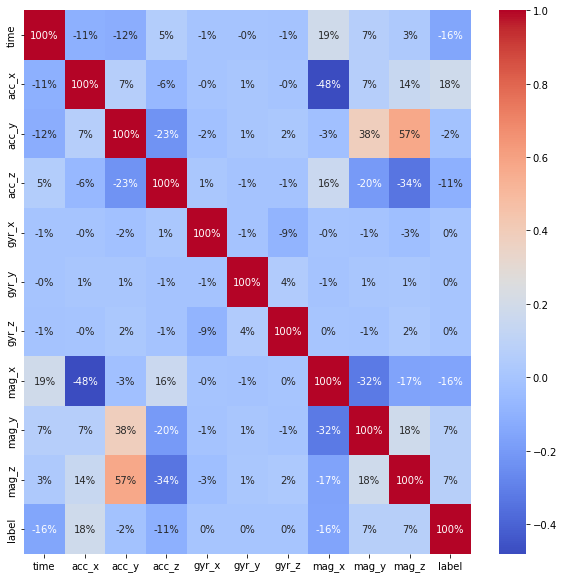

In [10]:
#Checking Correlation between all Variables
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor,annot = True, cmap="coolwarm", fmt = '.0%' )
plt.show()

In [11]:
df.isnull().sum() #checking null values #No null value

time     0
acc_x    0
acc_y    0
acc_z    0
gyr_x    0
gyr_y    0
gyr_z    0
mag_x    0
mag_y    0
mag_z    0
label    0
dtype: int64

In [12]:
#seperating the input and output variables into 2 different dataframes
a = df.drop(['label'], axis = 1)
a
b = df[['label']]
b

,label
0,2
1,2
2,2
3,2
4,2
...,...
145364,3
145365,3
145366,3
145367,3


In [13]:
#checking the statistical parameters of values under each input variable
a.describe()

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
count,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07,1.226352e+07
mean,1.628243e+09,-2.807402e-02,6.211683e-01,1.081455e-01,8.722215e-01,-1.837340e+00,-6.375345e-01,-2.934089e+02,4.300977e+02,2.037158e+02
std,1.205662e+05,2.622167e-01,7.084800e-01,1.888613e-01,1.282481e+01,2.014151e+01,1.030093e+01,2.736141e+02,5.969720e+02,4.382996e+02
min,1.628067e+09,-1.599756e+01,-1.314160e+01,-1.599121e+01,-1.999756e+03,-1.998779e+03,-1.999756e+03,-1.534500e+03,-1.057500e+03,-1.152000e+03
25%,1.628106e+09,-2.182617e-01,8.281250e-01,3.173830e-02,-2.014160e+00,-5.676270e+00,-2.685547e+00,-4.635000e+02,-4.950000e+01,6.900000e+01
50%,1.628312e+09,-2.490230e-02,9.370118e-01,1.230469e-01,8.544922e-01,-1.892090e+00,-6.103516e-01,-2.535000e+02,1.395000e+02,3.165000e+02
75%,1.628335e+09,1.616211e-01,9.736329e-01,2.006836e-01,3.723145e+00,1.892090e+00,1.464844e+00,-1.260000e+02,9.795000e+02,5.520000e+02
max,1.628421e+09,1.051514e+01,1.182617e+01,1.599854e+01,1.999756e+03,1.999939e+03,1.973511e+03,7.920000e+02,1.918500e+03,1.179000e+03


In [14]:
#Performing basic Exploratory Data Analysis (EDA).

C:\Users\e19805\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

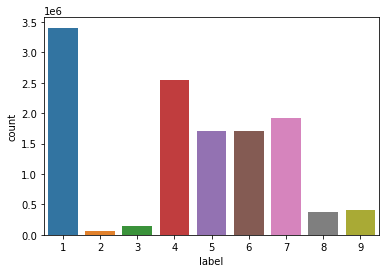

In [15]:
#checking the inbalance in the output variable ' label ' by plotting histogram
sns.countplot(b['label'])

In [16]:
#seperating the x and y variables
x = df.drop('label', axis = 1) #independent features
y = df['label'] #dependent features

In [17]:
#viewing the independent features
x.head(2)

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,1628079761,-0.187012,1.071289,0.321289,7.934570,-40.527344,17.028809,-526.5,1437.0,513.0
1,1628079761,-0.137207,1.099121,0.294922,0.305176,-44.677734,15.930176,-528.0,1423.5,495.0


In [18]:
#viewing the dependent features
y.head(2)

0    2
1    2
Name: label, dtype: int64

In [19]:
col_name = a.columns.values.tolist()
print (col_name)

['time', 'acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x', 'mag_y', 'mag_z']


In [20]:
#defining a variable named column_name n giving it all the column names expect time and label
column_name = ['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'mag_x','mag_y', 'mag_z']

In [21]:
#identifying outliers

In [22]:
# Using a for loop inside a function to get the box plots(seaborn) of all the columns
def identify_outliers(give_df_name, give_column_name):
    for i in column_name:
        fig = plt.figure(figsize=(6,8))
        sns.boxplot(data = x, y = i)
plt.show()

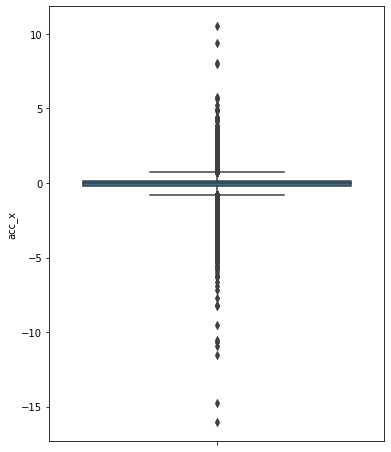

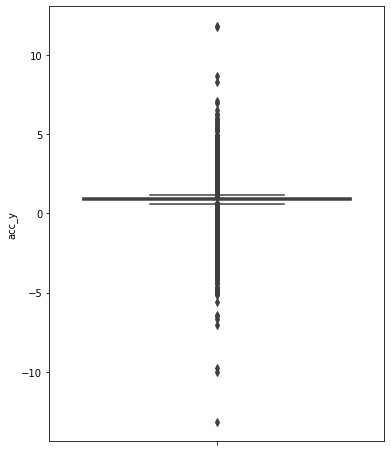

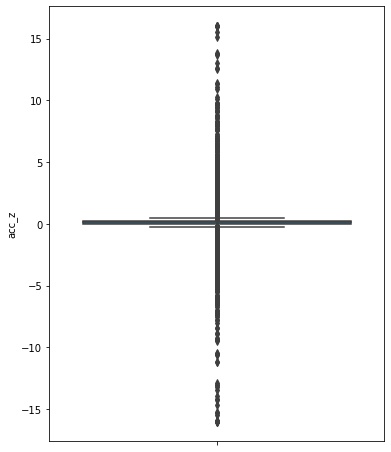

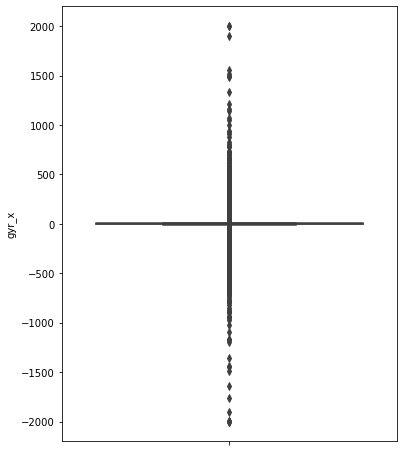

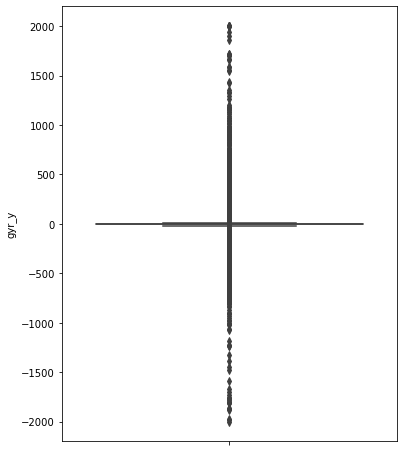

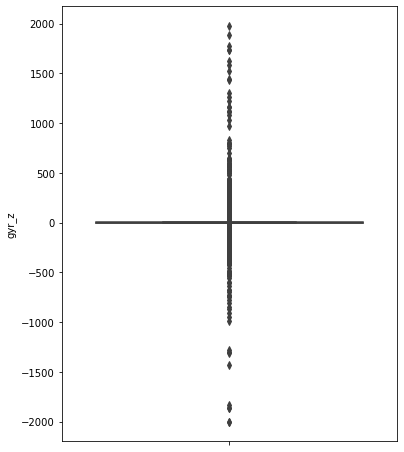

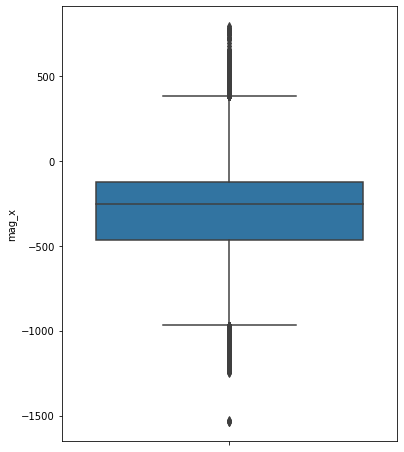

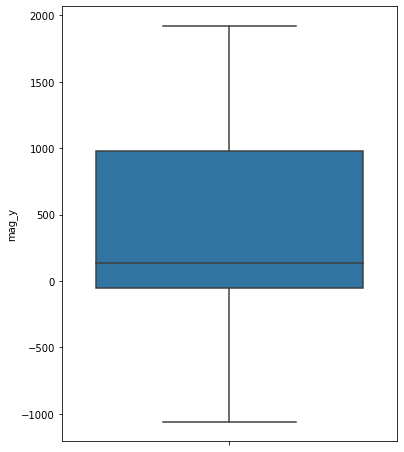

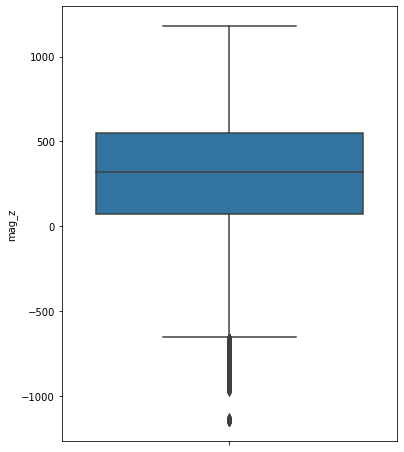

In [23]:
identify_outliers(x, column_name)

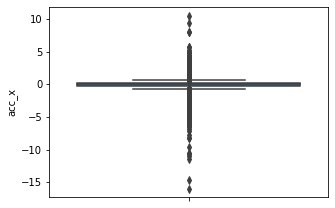

In [24]:
#creating boxplot for every column to check for outlier values
fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'acc_x')
plt.xticks(rotation = 'horizontal')
plt.show()

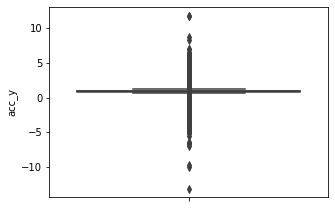

In [25]:
fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'acc_y')
plt.xticks(rotation = 'horizontal')
plt.show()


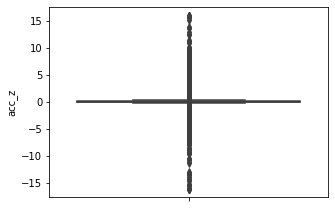

In [26]:
fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'acc_z')
plt.xticks(rotation = 'horizontal')
plt.show()

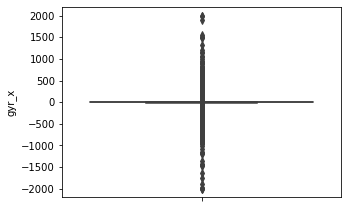

In [27]:
fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'gyr_x')
plt.xticks(rotation = 'horizontal')
plt.show()

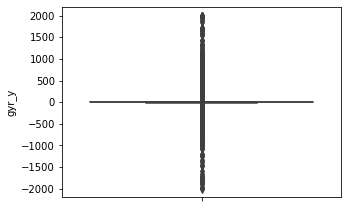

In [28]:
fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'gyr_y')
plt.xticks(rotation = 'horizontal')
plt.show()

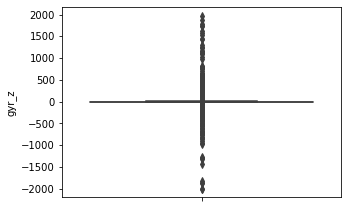

In [29]:
fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'gyr_z')
plt.xticks(rotation = 'horizontal')
plt.show()

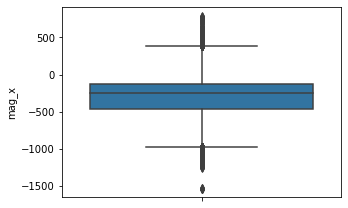

In [30]:
fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'mag_x')
plt.xticks(rotation = 'horizontal')
plt.show()

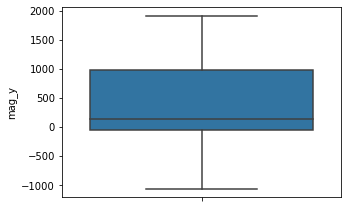

In [31]:
fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'mag_y')
plt.xticks(rotation = 'horizontal')
plt.show()

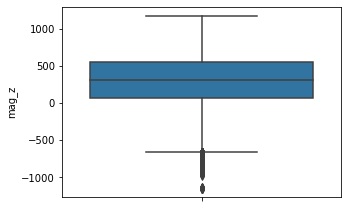

In [32]:
fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'mag_z')
plt.xticks(rotation = 'horizontal')
plt.show()

In [33]:
#Outlier treatment using IQR method

Imputing the upper and lower outlier values with median

In [34]:
# define a function called 'outliers' which returns a list of index of outliers
def outliers(a,ft):
  Q3 = a[ft].quantile(0.75)
  Q1 = a[ft].quantile(0.25)
  IQR = Q3-Q1

  upper_limit = Q3 + 1.5*IQR
  lower_limit = Q1 - 1.5*IQR

  ls = a.index[(a[ft<lower_limit])] |  a.index[(a[ft>upper_limit])]
  
  return ls

In [35]:
#define a function called 'remove' which returns a clean dataframe into an array without outliers
def remove(a,ls) :
  ls = sorted(set(ls))
  a1 = a.drop(ls)
  return a1

upper_limit 0.7314453000000001
lower_limit -0.7880859000000002


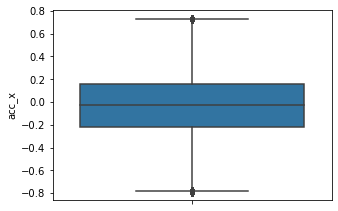

In [36]:
#printing the upper and lower limit values and the box plot with outliers removed
Q3 = a['acc_x'].quantile(0.75)
Q1 = a['acc_x'].quantile(0.25)
IQR = Q3-Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('upper_limit',upper_limit)
print ('lower_limit',lower_limit)

a.loc[a['acc_x']>upper_limit,'acc_x'] = np.median(a['acc_x'])
a.loc[a['acc_x']<lower_limit,'acc_x'] = np.median(a['acc_x'])

fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'acc_x')
plt.xticks(rotation = 'horizontal')
plt.show()
    

upper_limit 1.1918947500000001
lower_limit 0.60986315


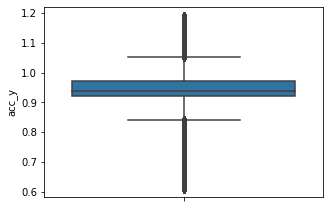

In [37]:
Q3 = a['acc_y'].quantile(0.75)
Q1 = a['acc_y'].quantile(0.25)
IQR = Q3-Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('upper_limit',upper_limit)
print ('lower_limit',lower_limit)

a.loc[a['acc_y']>upper_limit,'acc_y'] = np.median(a['acc_y'])
a.loc[a['acc_y']<lower_limit,'acc_y'] = np.median(a['acc_y'])

fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'acc_y')
plt.xticks(rotation = 'horizontal')
plt.show()

upper_limit 0.45410154999999996
lower_limit -0.22167965


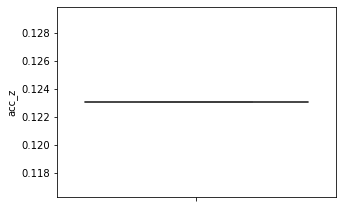

In [38]:
Q3 = a['acc_z'].quantile(0.75)
Q1 = a['acc_z'].quantile(0.25)
IQR = Q3-Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('upper_limit',upper_limit)
print ('lower_limit',lower_limit)

a.loc[a['acc_y']>upper_limit,'acc_z'] = np.median(a['acc_z'])
a.loc[a['acc_y']<lower_limit,'acc_z'] = np.median(a['acc_z'])

fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'acc_z')
plt.xticks(rotation = 'horizontal')
plt.show()

upper_limit 12.329101399999999
lower_limit -10.620116999999999


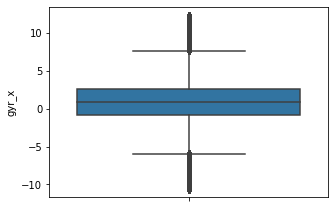

In [39]:
Q3 = a['gyr_x'].quantile(0.75)
Q1 = a['gyr_x'].quantile(0.25)
IQR = Q3-Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('upper_limit',upper_limit)
print ('lower_limit',lower_limit)

a.loc[a['gyr_x']>upper_limit,'gyr_x'] = np.median(a['gyr_x'])
a.loc[a['gyr_x']<lower_limit,'gyr_x'] = np.median(a['gyr_x'])

fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'gyr_x')
plt.xticks(rotation = 'horizontal')
plt.show()

upper_limit 13.24462875
lower_limit -17.02880845


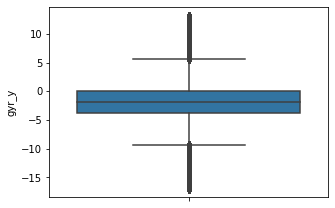

In [40]:
Q3 = a['gyr_y'].quantile(0.75)
Q1 = a['gyr_y'].quantile(0.25)
IQR = Q3-Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('upper_limit',upper_limit)
print ('lower_limit',lower_limit)

a.loc[a['gyr_y']>upper_limit,'gyr_y'] = np.median(a['gyr_y'])
a.loc[a['gyr_y']<lower_limit,'gyr_y'] = np.median(a['gyr_y'])

fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'gyr_y')
plt.xticks(rotation = 'horizontal')
plt.show()

upper_limit 7.6904296
lower_limit -8.911132799999999


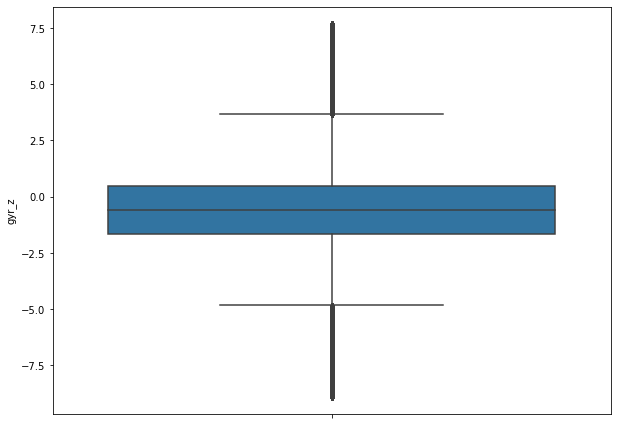

In [41]:
Q3 = a['gyr_z'].quantile(0.75)
Q1 = a['gyr_z'].quantile(0.25)
IQR = Q3-Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('upper_limit',upper_limit)
print ('lower_limit',lower_limit)

a.loc[a['gyr_z']>upper_limit,'gyr_z'] = np.median(a['gyr_z'])
a.loc[a['gyr_z']<lower_limit,'gyr_z'] = np.median(a['gyr_z'])

fig = plt.figure(figsize = (10,7.5))
sns.boxplot(data = a,y = 'gyr_z')
plt.xticks(rotation = 'horizontal')
plt.show()

upper_limit 380.25
lower_limit -969.75


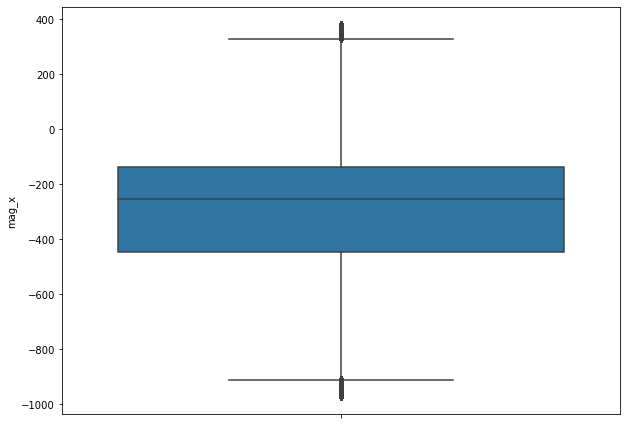

In [42]:
Q3 = a['mag_x'].quantile(0.75)
Q1 = a['mag_x'].quantile(0.25)
IQR = Q3-Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('upper_limit',upper_limit)
print ('lower_limit',lower_limit)

a.loc[a['mag_x']>upper_limit,'mag_x'] = np.median(a['mag_x'])
a.loc[a['mag_x']<lower_limit,'mag_x'] = np.median(a['mag_x'])

fig = plt.figure(figsize = (10,7.5))
sns.boxplot(data = a,y = 'mag_x')
plt.xticks(rotation = 'horizontal')
plt.show()

upper_limit 2523.0
lower_limit -1593.0


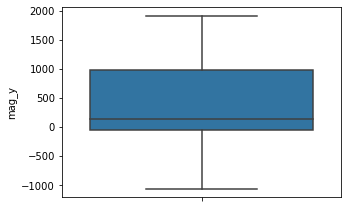

In [43]:
Q3 = a['mag_y'].quantile(0.75)
Q1 = a['mag_y'].quantile(0.25)
IQR = Q3-Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('upper_limit',upper_limit)
print ('lower_limit',lower_limit)

a.loc[a['mag_y']>upper_limit,'mag_y'] = np.median(a['mag_y'])
a.loc[a['mag_y']<lower_limit,'mag_y'] = np.median(a['mag_y'])

fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'mag_y')
plt.xticks(rotation = 'horizontal')
plt.show()

upper_limit 1276.5
lower_limit -655.5


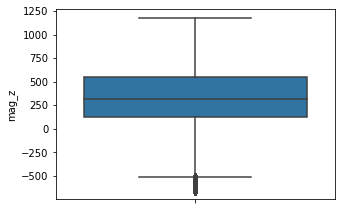

In [44]:
Q3 = a['mag_z'].quantile(0.75)
Q1 = a['mag_z'].quantile(0.25)
IQR = Q3-Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR
print ('upper_limit',upper_limit)
print ('lower_limit',lower_limit)

a.loc[a['mag_z']>upper_limit,'mag_z'] = np.median(a['mag_z'])
a.loc[a['mag_z']<lower_limit,'mag_z'] = np.median(a['mag_z'])

fig = plt.figure(figsize = (5,3.5))
sns.boxplot(data = a,y = 'mag_z')
plt.xticks(rotation = 'horizontal')
plt.show()

In [45]:
numeric = a.select_dtypes(exclude = 'object')
feature = a.columns

In [46]:
def report(feature):
  fig,ax = plt.subplots(1,2)
  fig.set_size_inches(15,3)
  fig.suptitle(feature,fontsize = 15)
  sns.histplot(data = numeric, x = feature ,kde = True,ax = ax[0])
  sns.boxplot(data = numeric, x = feature , kde = True, ax = ax[1])
  plt.show()

#print (numeric[feature].describe())

# Normalizing

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [48]:
scaling = MinMaxScaler()

In [49]:
scaling.fit_transform(x)

array([[0.03725611, 0.59633872, 0.56924942, ..., 0.43326886, 0.83820565,
        0.71428571],
       [0.03725611, 0.59821725, 0.57036414, ..., 0.43262411, 0.83366935,
        0.70656371],
       [0.03725611, 0.60446057, 0.56854539, ..., 0.44036106, 0.83215726,
        0.7020592 ],
       ...,
       [0.64816213, 0.59418395, 0.48388548, ..., 0.51128304, 0.45564516,
        0.75675676],
       [0.64816213, 0.59549155, 0.48394415, ..., 0.51579626, 0.45514113,
        0.75675676],
       [0.64816213, 0.59455229, 0.48494152, ..., 0.52224371, 0.45262097,
        0.74967825]])

In [50]:
x_normalized = pd.DataFrame(scaling.fit_transform(x))
x_normalized.head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.037256,0.596339,0.569249,0.509929,0.501984,0.489720,0.507589,0.433269,0.838206,0.714286
1,0.037256,0.598217,0.570364,0.509105,0.500076,0.488682,0.507312,0.432624,0.833669,0.706564
2,0.037256,0.604461,0.568545,0.506632,0.497696,0.489216,0.505991,0.440361,0.832157,0.702059


In [51]:
x_normalized = pd.DataFrame(scaling.fit_transform(x),columns = x.columns)
x_normalized.head(3)

,time,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,mag_x,mag_y,mag_z
0,0.037256,0.596339,0.569249,0.509929,0.501984,0.489720,0.507589,0.433269,0.838206,0.714286
1,0.037256,0.598217,0.570364,0.509105,0.500076,0.488682,0.507312,0.432624,0.833669,0.706564
2,0.037256,0.604461,0.568545,0.506632,0.497696,0.489216,0.505991,0.440361,0.832157,0.702059


In [52]:
#importing the KBest and Chisquare packages
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [53]:
#ranking the features
select_k_best_rank_features = SelectKBest(score_func = chi2, k = 5)
k_best_features = select_k_best_rank_features.fit(x_normalized,y)

df_k_scores = pd.DataFrame(k_best_features.scores_, columns = ['score'])
dfcolumns = pd.DataFrame(x_normalized.columns)

k_best_feature_rank = pd.concat([dfcolumns, df_k_scores], axis = 1)

k_best_feature_rank.columns = ('features', 'k_score')
print(k_best_feature_rank.nlargest(10, 'k_score'))

  features        k_score
0     time  551696.294963
8    mag_y   67694.199464
7    mag_x   50312.816786
9    mag_z   11355.708428
2    acc_y     586.474856
1    acc_x     417.949102
3    acc_z      82.346741
5    gyr_y       0.016930
4    gyr_x       0.010191
6    gyr_z       0.002825


In [54]:
x_selected_features = x_normalized[['time' ,'acc_x', 'mag_x', 'mag_y', 'acc_z', 'acc_y']]
x_selected_features.iloc[450,:]

time     0.037281
acc_x    0.615824
mag_x    0.421019
mag_y    0.810988
acc_z    0.508189
acc_y    0.563382
Name: 450, dtype: float64

In [55]:
import random
df1 = df.sample(10000)
df2 = df.sample(10000)

In [56]:
df1['label'].value_counts()

1    2732
4    2065
7    1568
5    1462
6    1376
9     335
8     309
3     113
2      40
Name: label, dtype: int64

In [57]:
df2['label'].value_counts()

1    2781
4    2066
7    1585
6    1401
5    1379
9     333
8     301
3     114
2      40
Name: label, dtype: int64

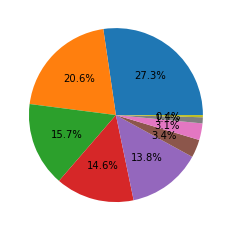

In [58]:
#distribution of sample df1
plt.pie(df1['label'].value_counts(), autopct = '%1.1f%%');

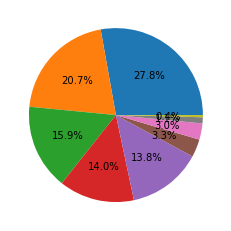

In [59]:
#distribution of sample df2
plt.pie(df2['label'].value_counts(), autopct = '%1.1f%%');

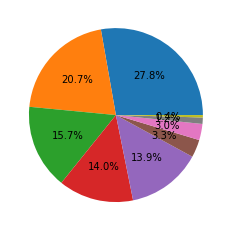

In [60]:
#distribution of population
plt.pie(df['label'].value_counts(), autopct = '%1.1f%%');

In [61]:
#Applying LR Model on df1

In [68]:
#Seperating df1 into independent(x1) and dependent(y1) variables
x1 = df1.drop('label', axis = 1)   #Independent features
y1 = df1[['label']]    #Dependent feature

In [69]:
#Splitting the data into train and test
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.25,random_state=20)
x1_train.shape

(7500, 10)

In [70]:
#Model building and training on train data
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x1_train,y1_train)

C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [71]:
#Model prediction on test data
y1_pred = log_reg.predict(x1_test)
y1_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [72]:
#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(y1_test,y1_pred)
print('Accuracy: ',accuracy,'\n')
print('Confusion_Matrix: ',confusion_matrix(y1_test,y1_pred),'\n')
print('Classification_Report: ', classification_report(y1_test,y1_pred))

Accuracy:  0.272 

Confusion_Matrix:  [[680   0   0   0   0   0   0   0   0]
 [  6   0   0   0   0   0   0   0   0]
 [ 28   0   0   0   0   0   0   0   0]
 [469   0   0   0   0   0   0   0   0]
 [397   0   0   0   0   0   0   0   0]
 [352   0   0   0   0   0   0   0   0]
 [393   0   0   0   0   0   0   0   0]
 [ 72   0   0   0   0   0   0   0   0]
 [103   0   0   0   0   0   0   0   0]] 

Classification_Report:                precision    recall  f1-score   support

           1       0.27      1.00      0.43       680
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00       469
           5       0.00      0.00      0.00       397
           6       0.00      0.00      0.00       352
           7       0.00      0.00      0.00       393
           8       0.00      0.00      0.00        72
           9       0.00      0.00      0.00       103

    accuracy                           0.2

C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Applying DT Model on df2

In [73]:
df2['label'].value_counts()

1    2781
4    2066
7    1585
6    1401
5    1379
9     333
8     301
3     114
2      40
Name: label, dtype: int64

C:\Users\e19805\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

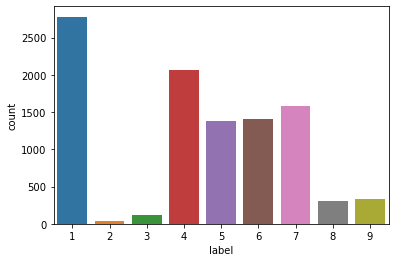

In [74]:
#Distribution of target variable 'label' on df2
sns.countplot(df2['label'])

In [77]:
#Using SMOTE to fix imbalance

In [78]:
#Splitting the data into x2 and y2(independent & dependent features)
x2 = df2.drop('label', axis = 1)
y2 = df2[['label']]

In [79]:
##Applying Decision Tree

In [80]:
#Spitting into train and test
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.30, random_state = 25)

In [81]:
type(y2_train)

pandas.core.frame.DataFrame

In [82]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x2_train, y2_train = oversample.fit_resample(x2_train, y2_train)
print('Classes and number of values in trainset after SMOTE:',y2_train.value_counts(),'\n')

Classes and number of values in trainset after SMOTE: label
1        1948
2        1948
3        1948
4        1948
5        1948
6        1948
7        1948
8        1948
9        1948
dtype: int64 



In [83]:
#importing decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state = 1000, max_depth = 5)

In [84]:
#Training the model
dt_model.fit(x2_train,y2_train)

DecisionTreeClassifier(max_depth=5, random_state=1000)

In [85]:
#Predictions on test data
y2_pred = dt_model.predict(x2_test)
print('Model.predict : ',y2_pred)

Model.predict :  [4 1 4 ... 4 5 9]


In [86]:
  #Model Evaluation
  from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
  accuracy = accuracy_score(y2_test,y2_pred)
  print('Accuracy: ',accuracy)
  print(confusion_matrix(y2_test,y2_pred))
  print(classification_report(y2_test,y2_pred))

Accuracy:  0.4116666666666667
[[140   8   5 188  22  73  42 117 238]
 [  0   2   1   1   1   2   0   0   1]
 [  0  11  11   0   2   2   0   0   3]
 [ 20   0   2 360   8  46  47  94  40]
 [  0   7   1  78 156  10  95  38  38]
 [  2   9   6 149   2 197   6  15  36]
 [  0   0   0  59  99   9 232  31  44]
 [  3   1   6  13   1   4   7  51   9]
 [  0   0   2   0   0   0   4   7  86]]
              precision    recall  f1-score   support

           1       0.85      0.17      0.28       833
           2       0.05      0.25      0.09         8
           3       0.32      0.38      0.35        29
           4       0.42      0.58      0.49       617
           5       0.54      0.37      0.44       423
           6       0.57      0.47      0.52       422
           7       0.54      0.49      0.51       474
           8       0.14      0.54      0.23        95
           9       0.17      0.87      0.29        99

    accuracy                           0.41      3000
   macro avg       0.4

In [87]:
# Applying Random Forest on df3

In [93]:
df3 = df1.sample(10000)

In [94]:
df3['label'].value_counts()

1    2732
4    2065
7    1568
5    1462
6    1376
9     335
8     309
3     113
2      40
Name: label, dtype: int64

In [95]:
#Splitting the data into x3 and y3(independent & dependent features)
x3 = df3.drop('label', axis = 1)
y3 = df3[['label']]

In [96]:
#Spitting into train and test
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.30, random_state = 30)

In [97]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x3_train, y3_train = oversample.fit_resample(x3_train, y3_train)
print('Classes and number of values in trainset after SMOTE:',y3_train.value_counts(),'\n')

Classes and number of values in trainset after SMOTE: label
1        1901
2        1901
3        1901
4        1901
5        1901
6        1901
7        1901
8        1901
9        1901
dtype: int64 



In [98]:
rf_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=500)

In [99]:
#Training the model
rf_model.fit(x3_train,y3_train)

C:\Users\e19805\AppData\Local\Temp\ipykernel_14256\538494668.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x3_train,y3_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=500)

In [100]:
#Predictions on test data
y3_pred = rf_model.predict(x3_test)
print('Model.predict : ',y3_pred)

Model.predict :  [7 8 1 ... 7 6 5]


In [101]:
#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(y3_test,y3_pred)
print('Accuracy: ',accuracy,'\n')
print(confusion_matrix(y3_test,y3_pred),'\n')
print(classification_report(y3_test,y3_pred))

Accuracy:  0.8576666666666667 

[[758   0   6  42   5   9   1   9   1]
 [  1   6   1   1   0   0   0   0   0]
 [  4   2  21   2   3   0   0   1   0]
 [ 66   4   0 526   5  29   2  31   0]
 [  3   0   0  10 397   4  15   1   6]
 [ 12   1   1  53   1 311   2   7   0]
 [  1   0   0   6  20   0 408   3   1]
 [ 11   0   1  21   0   5   2  49   0]
 [  3   0   0   2   8   0   1   1  97]] 

              precision    recall  f1-score   support

           1       0.88      0.91      0.90       831
           2       0.46      0.67      0.55         9
           3       0.70      0.64      0.67        33
           4       0.79      0.79      0.79       663
           5       0.90      0.91      0.91       436
           6       0.87      0.80      0.83       388
           7       0.95      0.93      0.94       439
           8       0.48      0.55      0.51        89
           9       0.92      0.87      0.89       112

    accuracy                           0.86      3000
   macro avg      

In [107]:
df4 = df1.sample(10000)

In [108]:
#Splitting the data into x4 and y4(independent & dependent features)
x4 = df4.drop('label', axis = 1)
y4 = df4[['label']]

In [109]:
#Spitting into train and test
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.25, random_state = 50)

#Importing SVC
from sklearn.svm import SVC
svc_model = SVC()

#Training the model
svc_model.fit(x4_train,y4_train)

#Predictions on test data
y4_pred = svc_model.predict(x4_test)
print('Model.predict : ',y4_pred)

#Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
accuracy = accuracy_score(y4_test,y4_pred)
print('Accuracy: ',accuracy)
print(confusion_matrix(y4_test,y4_pred))
print(classification_report(y4_test,y4_pred))

C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model.predict :  [1 1 1 ... 1 1 1]
Accuracy:  0.2768
[[692   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   0   0   0   0]
 [ 24   0   0   0   0   0   0   0   0]
 [499   0   0   0   0   0   0   0   0]
 [390   0   0   0   0   0   0   0   0]
 [339   0   0   0   0   0   0   0   0]
 [369   0   0   0   0   0   0   0   0]
 [ 86   0   0   0   0   0   0   0   0]
 [ 90   0   0   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.28      1.00      0.43       692
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00       499
           5       0.00      0.00      0.00       390
           6       0.00      0.00      0.00       339
           7       0.00      0.00      0.00       369
           8       0.00      0.00      0.00        86
           9       0.00      0.00      0.00        90

    accuracy                           0.28      2500

C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [110]:
#Getting model parameters
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [112]:
##GridSearchCV

In [113]:
param_grid = {'C':[0.1,1], 'gamma':[1,0.1], 'kernel':['rbf']}

In [114]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

In [115]:
#Fitting the grid to our training set
grid.fit(x4_train,y4_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.272 total time=  11.7s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.272 total time=   9.4s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.272 total time=  10.5s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.272 total time=   9.8s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.272 total time=  11.3s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.272 total time=  11.3s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.272 total time=  12.3s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.272 total time=  13.3s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.272 total time=  10.5s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.272 total time=  12.6s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.272 total time=  10.3s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.272 total time=  12.9s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.272 total time=  12.0s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.272 total time=  13.1s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.272 total time=  11.9s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.272 total time=  11.1s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 2/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.272 total time=  12.4s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.272 total time=  12.4s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.272 total time=  13.2s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.272 total time=  10.2s


C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [117]:
#Finding best parameters and estimators
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [118]:
grid.best_estimator_

SVC(C=0.1, gamma=1)

In [119]:
#Re-run predictions on this grid object 
grid_predictions = grid.predict(x4_test)

In [120]:
accuracy = accuracy_score(y4_test,grid_predictions)
print('Accuracy: ',accuracy,'\n')
print(classification_report(y4_test,grid_predictions))

Accuracy:  0.2768 

              precision    recall  f1-score   support

           1       0.28      1.00      0.43       692
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00       499
           5       0.00      0.00      0.00       390
           6       0.00      0.00      0.00       339
           7       0.00      0.00      0.00       369
           8       0.00      0.00      0.00        86
           9       0.00      0.00      0.00        90

    accuracy                           0.28      2500
   macro avg       0.03      0.11      0.05      2500
weighted avg       0.08      0.28      0.12      2500



C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\e19805\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
#SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x3_train, y3_train = oversample.fit_resample(x3_train, y3_train)
print('Classes and number of values in trainset after SMOTE:',y3_train.value_counts(),'\n')

Classes and number of values in trainset after SMOTE: label
1        1901
2        1901
3        1901
4        1901
5        1901
6        1901
7        1901
8        1901
9        1901
dtype: int64 

